## Pathological Myopia Detection Using Fundus Images

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |██▉                             | 37.5 MB 18 kB/s eta 5:45:5047    |█▏                              | 15.8 MB 181 kB/s eta 0:37:13

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib as plt

ModuleNotFoundError: No module named 'tensorflow'

In [61]:
# Image Processing Libraries
from tqdm import tqdm  # to show processing bar
from skimage.io import imread, imshow
from skimage.transform import resize

In [39]:
''' Standard Size of Images '''
img_width = 128 
img_hight = 128
img_channels = 3
# adjust randome seed size
seed = 42
np.random.seed = seed

##  Data Preprocessing

Resizing Training Images

In [7]:
'''  
Data Preprocessing
''' 
train_path = 'fundus/'
test_path = 'Validation/'
train_ids = next(os.walk(train_path))[2]#next return a tuple(all folders at 1 position
# test_ids = next(os.walk(test_path))[2]
# print(len(train_ids))
# print(len(test_ids))
X_train = np.zeros((len(train_ids),img_hight, img_width, img_channels), dtype=np.uint8)
# X_train.shape
Y_train = np.zeros((len(train_ids),img_hight, img_width, 1), dtype=np.bool) # for Masks
# Y_train.shape
#
""" Resizing Training Images  """
#
masks_path = next(os.walk('Atrophy/'))[2]
# print(masks_path)
training_ids = sorted(train_ids)
masks_ids = sorted(masks_path)
indx = 0
print('Resizing Training Images and Masks')
for img_id in tqdm(training_ids):
    image = imread(train_path+img_id)[:,:,:img_channels]
    image = resize(image, (img_hight, img_width), mode='constant', preserve_range= True)
    X_train[indx] = image # fill empty X_train with values from images
    mask = np.zeros((img_hight, img_width, 1), dtype=np.bool)
#     for mask_file in next(os.walk(path+'/masks/'))[2]:
    test_mask = imread('Atrophy/'+masks_ids[indx])
    test_mask = np.expand_dims(resize(test_mask,(img_hight, img_width), mode='constant', preserve_range=True), axis=-1)#
#     mask = np.maximum(mask, test_mask)
    Y_train[indx] = test_mask
    indx += 1 



  0%|          | 0/400 [00:00<?, ?it/s]

Resizing Training Images and Masks


100%|██████████| 400/400 [13:57<00:00,  2.09s/it]


In [54]:
test_path = next(os.walk('Validation/'))[2]
test_ids = sorted(test_path)
# print(test_ids)

Resizing Test Images

In [70]:
X_test = np.zeros((len(test_ids),img_hight, img_width, img_channels), dtype=np.uint8)
# X_test.shape
sizes_test = []
print('Resizing Test Images...')
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path =  'Validation/' + id_
    image = imread(path)[:,:,:img_channels]
    sizes_test.append([image.shape[0], image.shape[1]])
    image1 = resize(image, (img_hight, img_width), mode='constant', preserve_range=True)
    X_test[n] = image1
print('Resizing Done!!!')

  0%|          | 0/400 [00:00<?, ?it/s]

Resizing Test Images...


100%|██████████| 400/400 [11:04<00:00,  1.66s/it]

Resizing Done!!!


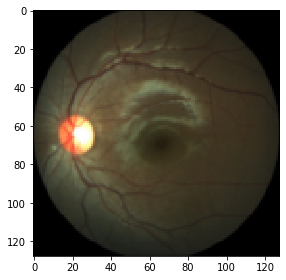

In [66]:
imshow(X_test[15]) # showing image
plt.show()

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/zawster/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['resize', 'imshow', 'plt', 'random', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


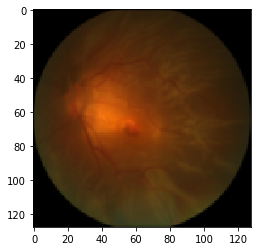

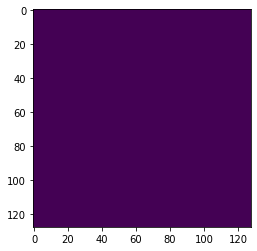

In [20]:
# Ploting Some Random Images
# image_x = 658
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x]) # showing image
plt.show()
imshow(np.squeeze(Y_train[image_x])) # show coresponding mask
plt.show()


In [26]:
print(train_ids[image_x])

P0194.jpg


Build the Model (Creating Neural Network)

In [27]:
# Build the Model
inputs = tf.keras.layers.Input((img_width, img_hight, img_channels)) # Input Layer
float_Values = tf.keras.layers.Lambda(lambda x: x / 255)(inputs) # converting each value into flot for Neural Network
# Contraction path (going down)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(float_Values)
c1 = tf.keras.layers.Dropout(0.1)(c1) # dropout of 10%
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1) # creating new Layer
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)  # MaxPolling layer

c2 = tf.keras.layers.Conv2D(32,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout((0.2))(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
p5 = tf.keras.layers.MaxPooling2D((2,2))(c5)

Up Scallig

In [28]:
#Expensive Path (Up Scalling)
u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)##
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)##
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16, (2,2), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (2,2), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
# Output layer
outputs = tf.keras.layers.Conv2D(1,(1,1), activation='sigmoid')(c9)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Compiling Model

In [29]:
# Compiling Model
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy')#, matrices=['accuracy'])  #optimize contais  Back propagation

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model Summary

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

ModelCheckpoints and Callbacks

In [32]:
# ModelCheckpoints
checkPointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    checkPointer
]
''' Following Command is used to Open Tensorboard into Browser'''
"""  
tensorboard --logdir=logs/ --host localhost --port 8088
"""


'  \ntensorboard --logdir=logs/ --host localhost --port 8088\n'

Fitting the Model 

In [33]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)#

Train on 360 samples, validate on 40 samples
Epoch 1/25
352/360 [============================>.] - ETA: 2s - loss: 0.1737
Epoch 00001: val_loss improved from inf to 0.11035, saving model to model_for_nuclei.h5
360/360 [==============================] - 100s 277ms/sample - loss: 0.1711 - val_loss: 0.1104
Epoch 2/25
352/360 [============================>.] - ETA: 2s - loss: 0.0468
Epoch 00002: val_loss improved from 0.11035 to 0.10352, saving model to model_for_nuclei.h5
360/360 [==============================] - 109s 301ms/sample - loss: 0.0470 - val_loss: 0.1035
Epoch 3/25
352/360 [============================>.] - ETA: 2s - loss: 0.0358
Epoch 00003: val_loss improved from 0.10352 to 0.05272, saving model to model_for_nuclei.h5
360/360 [==============================] - 112s 311ms/sample - loss: 0.0355 - val_loss: 0.0527
Epoch 4/25
352/360 [============================>.] - ETA: 2s - loss: 0.0284
Epoch 00004: val_loss did not improve from 0.05272
360/360 [==============================

#### Validation (Testing)

In [73]:
idx = random.randint(0, len(X_train))

# preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
# preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
# preds_test = model.predict(X_test, verbose=1)
predected_valid = model.predict(X_test[:int(X_test.shape[0]*0.9)], verbose=1)
preds_valid_t = (predected_valid > 0.5).astype(np.uint8)
# preds_val_t = (preds_val > 0.5).astype(np.uint8)
# preds_test_t = (preds_test > 0.5).astype(np.uint8)


360/360 [==============================] - 22s 62ms/sample


Actual Fundus Image:


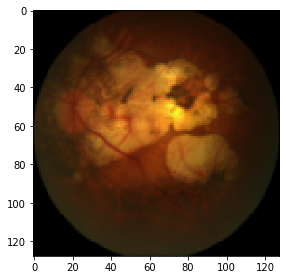

Predicted Optic Disk:


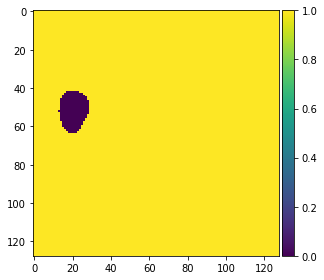

In [118]:
# perform a sanity check on some random training samples
ix = random.randint(0, len(preds_valid_t))
print('Actual Fundus Image:')
imshow(X_test[ix])
plt.show()
print('Predicted Optic Disk:')
imshow(np.squeeze(preds_valid_t[ix]))
plt.show()